<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/SQL%20for%20mental%20health%20data%20analysis/Queries%20for%20analysis/General_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SQL queries and analysis

### Basic information from the surveys

La información que proporciona la base de datos estudiada es muy variada y amplia, así que pueden realizarse diferentes enfoques para su análisis. A continuación se estudiarán aspectos generales de las respuestas de los encuestados y comparaciones entre los años que fueron realizadas las encuestas. Para realizar lo mencionado, la información requerida será demandada a partir de queries en SQL y serán visualizados como dataframes de Pandas.

En primer lugar, es de interés conocer el número de encuestados y de respuestas por año. De esta manera, puede verse aproximadamente la relación entre los encuestados por año con el número de preguntas hechas cada año, ya que no en todas las encuestas se realizaron el mismo número de preguntas vistas en la tabla Question. A continuación la consulta

In [ ]:
query= """
SELECT DISTINCT
  SurveyID AS Year,
  COUNT(DISTINCT UserID) AS Num_users, 
  COUNT(UserID) AS Num_answers
FROM
  Answer
GROUP BY 
  SurveyID
"""

num_survey= pd.read_sql(sql=query, con=connection)
display(num_survey)

,Year,Num_users,Num_answers
0,2014,1260,32760
1,2016,1433,88238
2,2017,756,57456
3,2018,417,31692
4,2019,352,26752


Los resultados obtenidos en el anterior dataframe pueden verse gráficamente en las siguientes figuras

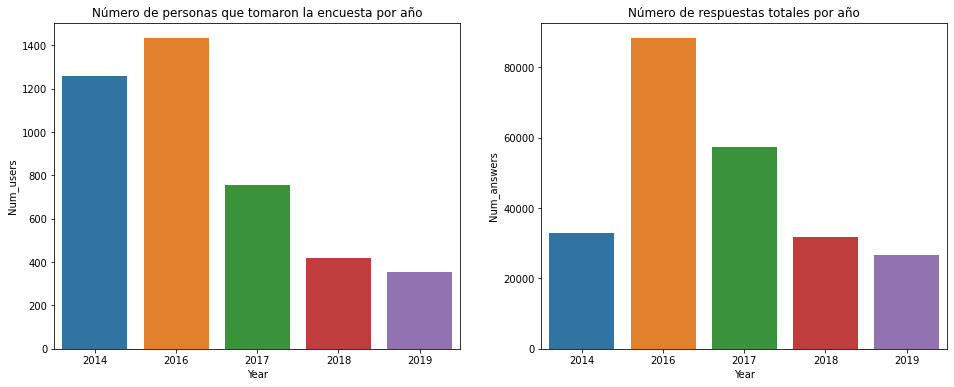

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(x=num_survey['Year'], y= num_survey['Num_users'], ax = ax[0]);
sns.barplot(x=num_survey['Year'], y= num_survey['Num_answers'], ax = ax[1]);
ax[0].title.set_text('Número de personas que tomaron la encuesta por año');
ax[1].title.set_text('Número de respuestas totales por año');

De lo visto anteriormente, el hecho más relevante es notar que el número de preguntas hechas en la encuesta de 2014 fue bastante menor que las del resto de años, lo cual puede evidenciarse al comparar las barras de los años 2014 y 2016 en ambas gráficas, ya que el número de personas que tomaron la encuesta en 2014 es apenas menor que las de 2016, pero el número de respuestas en 2016 es bastante más elevado que las vistas en 2014, más del doble. Esto podría influir en la interpretación de las respuestas obtenidas a las preguntas realizadas.

Para dejar en claro que lo mencionado arriba es cierto, verificamos el número de preguntas hechas en cada encuesta

In [ ]:
query="""
SELECT DISTINCT
  SurveyID AS Year,
  COUNT(DISTINCT QuestionID) AS Num_questions
FROM 
  Answer
GROUP BY
  Year
"""
questions= pd.read_sql(sql=query, con=connection)
display(questions)

,Year,Num_questions
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


Dichos resultados se muestran gráficamente, junto con el número de personas encuestadas cada año

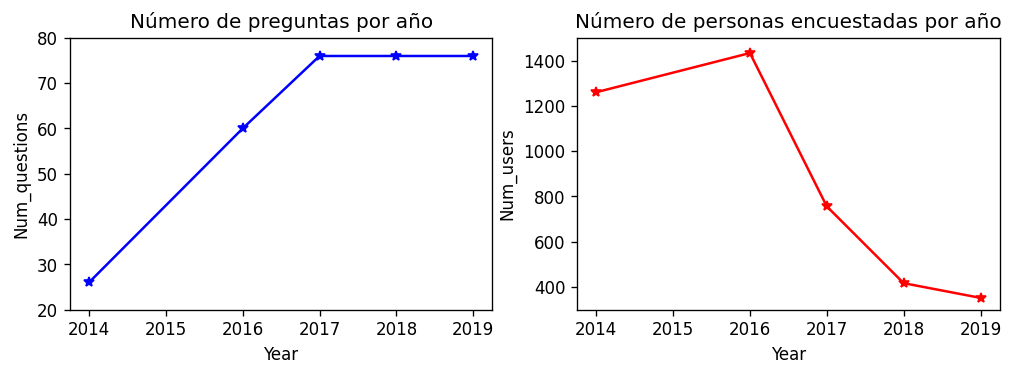

In [ ]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(10,3), sharex=True, sharey= False, dpi=120)
ax1.plot(questions['Year'],questions['Num_questions'], 'b*-')
ax2.plot(num_survey['Year'],num_survey['Num_users'],'r*-')
ax1.set(title='Número de preguntas por año', xlabel='Year', ylabel='Num_questions', ylim=(20,80))
ax2.set(title='Número de personas encuestadas por año', xlabel='Year', ylabel='Num_users', ylim=(300, 1500))
plt.show()

Las gráficas dejan ver lo que ya se había mencionado: un aumento en el número de preguntas de la encuesta con el paso de los años, estabilizandose desde 2017. Además, el número de encuestados disminuye considerablemente después de 2016 y, a pesar de que su razón que se desconoce, podría atribuirse a dicho aumento en el número de preguntas, ya que la gente puede desanimarse al tener que gastar más tiempo en responder las preguntas. Aún así, es otro hecho que puede influir en las conclusiones respecto a las respuestas obtenidas.

Debido a que ya se revisó el número de preguntas, un análisis similar puede realizarse de las respuestas que se tienen para cada pregunta en las diferentes encuentas realizadas. Para cumplir con lo anterior, se define la siguiente función

In [ ]:
def answer_per_year(year):
  query=f"""
  SELECT DISTINCT
    A.SurveyID AS Year,
    COUNT(A.UserID) AS num_answers,
    Q.questiontext AS text,
    A.QuestionID
  FROM
    Answer AS A
  INNER JOIN
    Question AS Q
  ON
    A.QuestionID = Q.questionid
  WHERE
    Year = {year}
  GROUP BY
    text
  ORDER BY
    A.QuestionID
  """
  return query

Ahora se calcula para cada año de las encuestas realizadas y se visualizan los resultados para algunos de ellos

In [ ]:
answers_2014= pd.read_sql(sql=answer_per_year(2014), con=connection)
answers_2016= pd.read_sql(sql=answer_per_year(2016), con=connection)
answers_2017= pd.read_sql(sql=answer_per_year(2017), con=connection)
answers_2018= pd.read_sql(sql=answer_per_year(2018), con=connection)
answers_2019= pd.read_sql(sql=answer_per_year(2019), con=connection)

In [ ]:
display(answers_2016.tail())

,Year,num_answers,text,QuestionID
55,2016,1433,Do you think that team members/co-workers woul...,114
56,2016,2072,"If yes, what condition(s) have you been diagno...",115
57,2016,1793,"If maybe, what condition(s) do you believe you...",116
58,2016,2692,Which of the following best describes your wor...,117
59,2016,1433,Do you work remotely?,118


In [ ]:
display(answers_2019.head())

,Year,num_answers,text,QuestionID
0,2019,352,What is your age?,1
1,2019,352,What is your gender?,2
2,2019,352,What country do you live in?,3
3,2019,352,"If you live in the United States, which state ...",4
4,2019,352,Are you self-employed?,5


De los resultados para esta consulta, se evidencia que muchas de las preguntas fueron respondidas el número de veces correcto, es decir, una respuesta por pregunta por persona. Sin embargo, en los datos de la encuesta de 2016 se observa que algunas preguntas fueron respondidas más veces que el número de personas encuestadas dicho año, hecho que puede afectar negativamente el análisis respecto a estas preguntas.